In [1]:
import sys
sys.path.insert(1,'../')
from kidcalc import cinduct as calc_cinduct
import matplotlib.pyplot as plt
import numpy as np

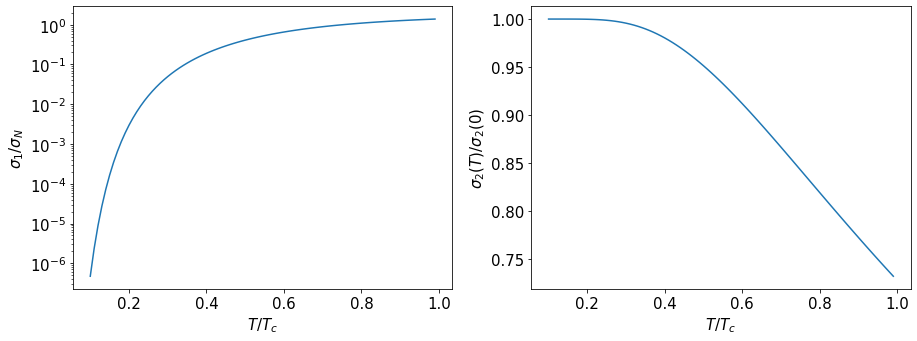

In [2]:
D = 3.52/2
hw = D/10
kbT = np.arange(.1,1.,.01)

plt.rcParams.update({'font.size':15})
fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
cind = np.zeros((len(kbT),2))
for i in range(len(kbT)):
    cind[i,:] = calc_cinduct(hw,D,kbT[i])
ax1.plot(kbT,cind[:,0])
ax2.plot(kbT,cind[:,1]/calc_cinduct(hw,D,.001)[1])
ax1.set_ylabel(r'$\sigma_1/\sigma_N$')
ax2.set_ylabel(r'$\sigma_2(T)/\sigma_2(0)$')
ax1.set_xlabel(r'$T/T_c$')
ax2.set_xlabel(r'$T/T_c$')
ax1.set_yscale('log')
fig.tight_layout()
plt.savefig('../../Report/figures/SPR_sigmaval.pdf')

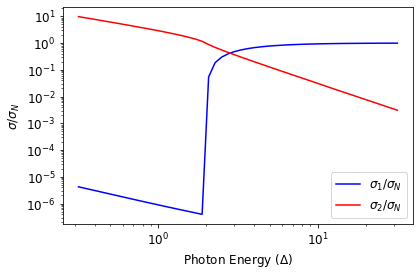

In [3]:
D = 1
kbT = 1/8/1.76
hwar = np.logspace(-.5,1.5)
cind = np.zeros((len(hwar),2))
for hw,i in zip(hwar,range(len(hwar))): 
    cind[i,:] = calc_cinduct(hw,D,kbT)
plt.rcParams.update({'font.size':12})
plt.plot(hwar,np.abs(cind[:,0]),'b') #!!!NOTE THE ABS, TO MAKE IT NON-NEGATIVE
plt.plot(hwar,cind[:,1],'r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Photon Energy ($\\Delta$)')
plt.ylabel('$\\sigma/\\sigma_N$')
plt.legend(['$\\sigma_1/\\sigma_N$','$\\sigma_2/\\sigma_N$'])

plt.tight_layout()
plt.savefig('../../Report/figures/SPR_sigmafreq.pdf')

## To check the integration method

In [4]:
import scipy.integrate as integrate
from kidcalc import integrand11,ine

In [5]:
hw = D/10
kbT = D/20
print(integrate.quad(integrand11,D,np.inf,args = (hw,D,kbT))[0] - 
      (integrate.quad(integrand11,D,1.5*D,args = (hw,D,kbT))[0] + 
       integrate.quad(integrand11,1.5*D,np.inf,args = (hw,D,kbT))[0]))

TypeError: unsupported operand type(s) for /: 'function' and 'int'